In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### For variables measured on a nominal or an ordinal scale it's common to use a bar plot to visualize their distribution.

In [2]:
wnba = pd.read_csv('wnba.csv')

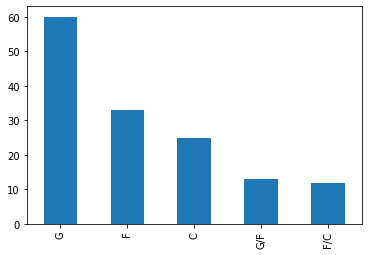

In [3]:
wnba.Pos.value_counts().plot.bar()

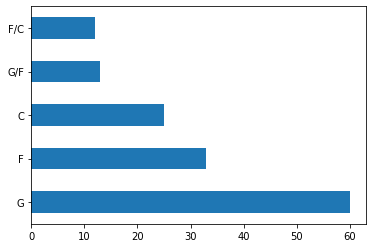

In [4]:
wnba['Pos'].value_counts().plot.barh()

In [5]:
def label_experience(row):
    exp = 0 if row['Experience'] == 'R' else int(row['Experience'])
    if exp == 0:
        return 'Rookie'
    if exp <= 3:
        return 'Little experience'
    if exp <= 5:
        return 'Experienced'
    if exp <= 10:
        return 'Very experienced'
    if exp > 10:
        return 'Veteran'
    return None
wnba['Exp_ordinal'] = wnba.apply(label_experience, axis = 1)
wnba.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3,Exp_ordinal
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,...,22,28,12,3,6,12,93,0,0,Little experience
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,...,82,101,72,63,13,40,217,0,0,Veteran
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,...,36,40,78,22,3,24,218,0,0,Experienced
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,...,134,169,65,20,10,38,188,2,0,Very experienced
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,...,9,12,12,7,0,14,50,0,0,Rookie


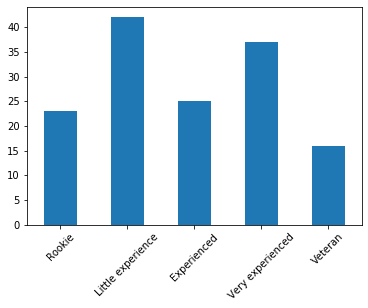

In [6]:
exp_freq = wnba.Exp_ordinal.value_counts().iloc[[3, 0, 2, 1, 4]]
exp_freq.plot.bar(rot = 45)

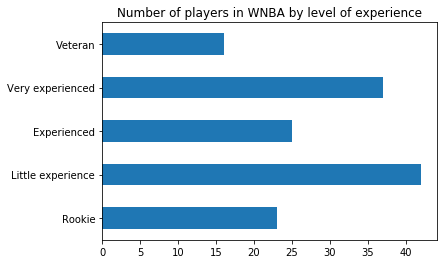

In [7]:
exp_freq.plot.barh(title = 'Number of players in WNBA by level of experience')

Text(0, 0.5, '')

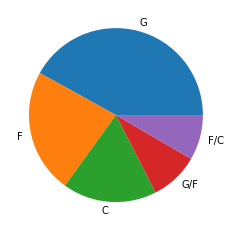

In [8]:
wnba.Pos.value_counts().plot.pie()
plt.ylabel('')

### The main advantage of pie charts over bar plots is that they provide a much better sense for the relative frequencies (proportions and percentages) in the distribution.

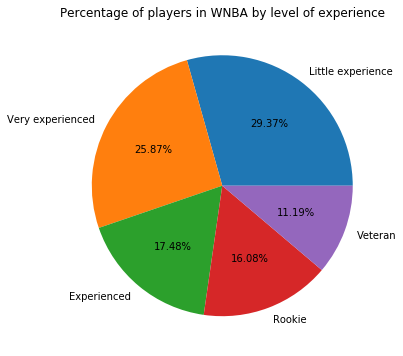

In [9]:
wnba.Exp_ordinal.value_counts().plot.pie(figsize = (6,6), autopct = '%.2f%%', 
                                         title = 'Percentage of players in WNBA by level of experience')
plt.ylabel('')
plt.show()

In [10]:
wnba.Exp_ordinal.value_counts(normalize=True) * 100

Little experience    29.370629
Very experienced     25.874126
Experienced          17.482517
Rookie               16.083916
Veteran              11.188811
Name: Exp_ordinal, dtype: float64

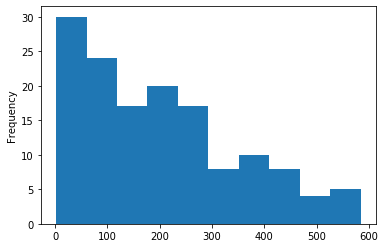

In [11]:
wnba.PTS.plot.hist()

### * Under the hood of pd.Series.plot.hist() method:
   * ### Generated a grouped frequency distribution table for the PTS variable with ten class intervals.
   * ### For each class interval it plotted a bar with a height corresponding to the frequency of the interval.
--------------
## Histogram is basically the viausal form of a grouped frequency table. No gaps between bars, and each bar represents an interval, not a single value. hist vs. bar plot

In [12]:
print(wnba.PTS.value_counts(bins = 10).sort_index())

(1.417, 60.2]     30
(60.2, 118.4]     24
(118.4, 176.6]    17
(176.6, 234.8]    20
(234.8, 293.0]    17
(293.0, 351.2]     8
(351.2, 409.4]    10
(409.4, 467.6]     8
(467.6, 525.8]     4
(525.8, 584.0]     5
Name: PTS, dtype: int64


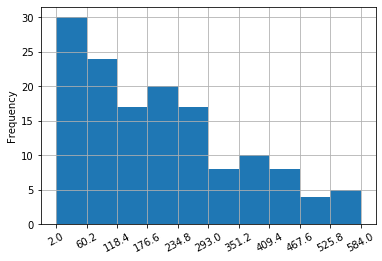

In [13]:
wnba.PTS.plot.hist(grid = True, xticks = np.arange(2,585, 58.2), rot = 28)

In [14]:
wnba.PTS.describe(percentiles=[.25,.5,.75,.9]).iloc[3:]

min      2.0
25%     75.0
50%    177.0
75%    277.5
90%    440.6
max    584.0
Name: PTS, dtype: float64

* Most of the value (75%) are distributed within a relatively narrow interval (2-277). Which tells us:
* 1. The values are distributed unevenly across the 2 - 584 range
* 2. Most values are clustered in the first (left) part of the distribution's range.

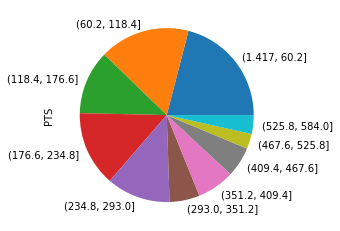

In [15]:
wnba.PTS.value_counts(bins = 10).sort_index().plot.pie()

In [16]:
print(wnba['Games Played'].describe()[3:])

min     2.0
25%    22.0
50%    27.0
75%    29.0
max    32.0
Name: Games Played, dtype: float64


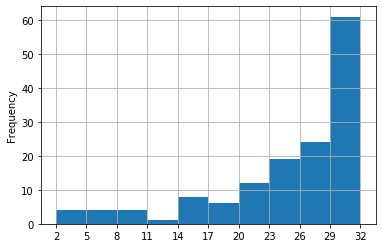

In [17]:
wnba['Games Played'].plot.hist(grid = True, xticks = np.arange(2,33,3))

In [18]:
np.arange(2,33,3)

array([ 2,  5,  8, 11, 14, 17, 20, 23, 26, 29, 32])

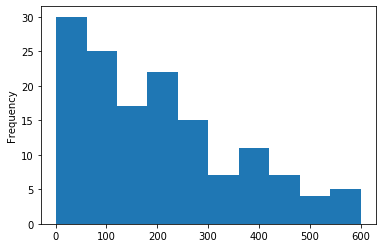

In [19]:
wnba.PTS.plot.hist(range = (1,600), bins = 10)

Text(0.5, 0, 'Games played')

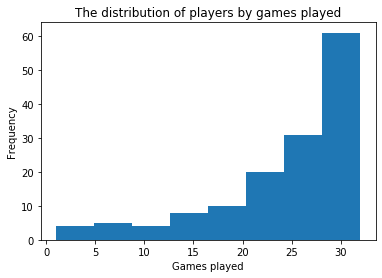

In [20]:
wnba['Games Played'].plot.hist(range = (1,32), bins = 8, title = 'The distribution of players by games played')
plt.xlabel('Games played')

## Both these histograms show skewed distributions. In a skewed distributions:
   * ### 1. The values pile up toward the end or the starting point of the range, making up the body of the distribution.
   * ### 2. Then the values decrease in frequency toward the opposite end, forming the tail of distribution.
   * ### If the tail points to the right, then the distribution is right skewed. The distribution is sometimes also said to be positively skewed because the tail points in the direction of positive numbers.
   * ### If the tail points to the left, the distribution is said to be left skewed. When it points to the left, the tail points at the same time in the direction of negative numbers, and so is also called negatively skewed.
   * ### If the shape of the distribution is symmetrical, then it's symmetrical distribution.
   * ### A very common symmetrical distribution is one where the values pile up in the middle and gradually decrease in frequency toward both ends of the histogram. --- Normal distribution (also called Gaussian distribution)
   * ### Another common symmetrical distribution is one where the values are distributed uniformaly across the entire range. --- Uniform distribution

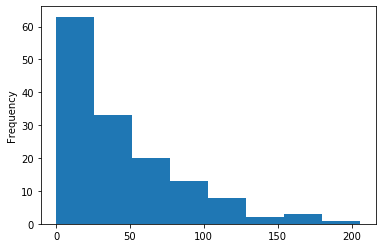

In [21]:
wnba.AST.plot.hist(bins = 8)

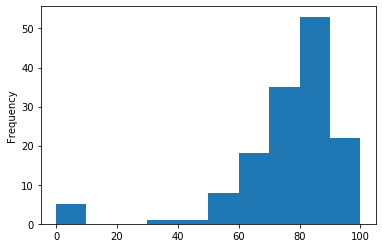

In [22]:
wnba['FT%'].plot.hist()

In [23]:
assists_distro = 'right skewed'
ft_percent_distro = 'left skewed'

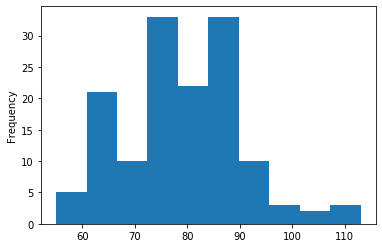

In [24]:
wnba.Weight.plot.hist()
# Closely a normal distribution. MOst values pile up somewhere close to the middle and decrease in frequency more 
# or less gradually toward both ends of the histogram.

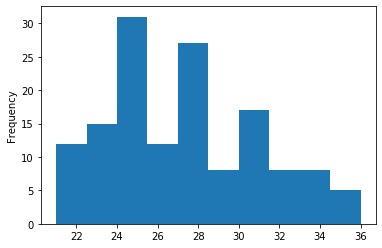

In [25]:
wnba.Age.plot.hist()

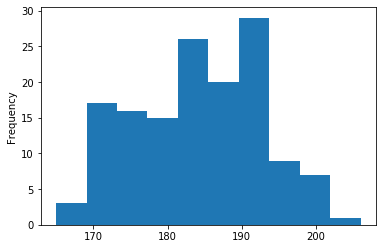

In [26]:
wnba.Height.plot.hist()

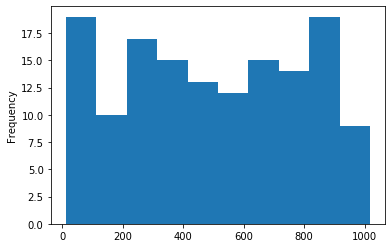

In [27]:
wnba.MIN.plot.hist()

###########################################################################################

In [28]:
wnba.head()

,Name,Team,Pos,Height,Weight,BMI,Birth_Place,Birthdate,Age,College,...,DREB,REB,AST,STL,BLK,TO,PTS,DD2,TD3,Exp_ordinal
0,Aerial Powers,DAL,F,183,71.0,21.200991,US,"January 17, 1994",23,Michigan State,...,22,28,12,3,6,12,93,0,0,Little experience
1,Alana Beard,LA,G/F,185,73.0,21.329438,US,"May 14, 1982",35,Duke,...,82,101,72,63,13,40,217,0,0,Veteran
2,Alex Bentley,CON,G,170,69.0,23.875433,US,"October 27, 1990",26,Penn State,...,36,40,78,22,3,24,218,0,0,Experienced
3,Alex Montgomery,SAN,G/F,185,84.0,24.543462,US,"December 11, 1988",28,Georgia Tech,...,134,169,65,20,10,38,188,2,0,Very experienced
4,Alexis Jones,MIN,G,175,78.0,25.469388,US,"August 5, 1994",23,Baylor,...,9,12,12,7,0,14,50,0,0,Rookie


## Analyze how the distributions of the Pos variable (player position) varies with the level of experience.

In [29]:
rookies = wnba[wnba.Exp_ordinal == 'Rookie']
little_xp = wnba[wnba['Exp_ordinal'] == 'Little experience']
experienced = wnba[wnba['Exp_ordinal'] == 'Experienced']
very_xp = wnba[wnba['Exp_ordinal'] == 'Very experienced']
veterans =  wnba[wnba['Exp_ordinal'] == 'Veteran']

In [30]:
rookie_distro = rookies.Pos.value_counts()
little_xp_distro = little_xp.Pos.value_counts()
experienced_distro = experienced.Pos.value_counts()
very_xp_distro = very_xp.Pos.value_counts()
veteran_distro = veterans.Pos.value_counts()

### grouped bar plot

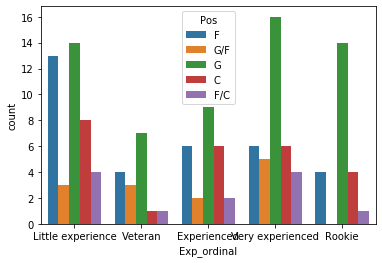

In [31]:
sns.countplot(x = 'Exp_ordinal', hue = 'Pos', data = wnba)

* There's only one rookie player on a combined position (F/C). This is significantly less compared to more experience players, which suggests that combined positions (F/C and G/F) may require more complex skills on the field that rookies rarely have.
* Rookies are the only category where we don't find players on all positions.
* Guards redominate for every level of experiences.

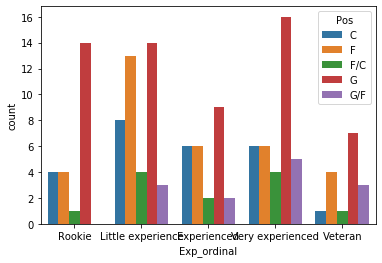

In [32]:
sns.countplot(x = 'Exp_ordinal', hue = 'Pos', order = ['Rookie', 'Little experience', 'Experienced',
                                                      'Very experienced', 'Veteran'], 
              hue_order=['C','F','F/C','G','G/F'],
             data = wnba)

In [33]:
wnba.MIN.mean()

496.97202797202794

### Hypothesis: older players generally play less than this average, younger more
### Not right

In [34]:
wnba.Age.mean()

27.076923076923077

In [35]:
wnba['age_mean_relative'] = wnba.Age.apply(lambda x: 'old' if x >= 27 else 'young')
wnba['min_mean_relative'] = wnba.MIN.apply(lambda x: 'average or above' if x >= 497 else 'below average')

In [36]:
wnba[['Name', 'Age', 'age_mean_relative', 'MIN', 'min_mean_relative']].head()

,Name,Age,age_mean_relative,MIN,min_mean_relative
0,Aerial Powers,23,young,173,below average
1,Alana Beard,35,old,947,average or above
2,Alex Bentley,26,young,617,average or above
3,Alex Montgomery,28,old,721,average or above
4,Alexis Jones,23,young,137,below average


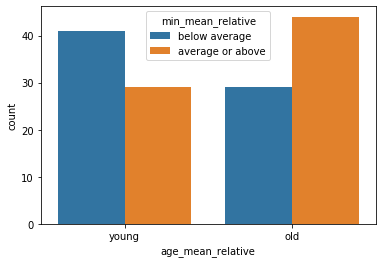

In [38]:
sns.countplot(x = 'age_mean_relative', hue = 'min_mean_relative', order = ['young', 'old'], 
             hue_order=['below average', 'average or above'], data = wnba)

### The min_mean_relative variable is ordinal, and it was derived from the MIN variable, which is measured on a ratio scale. HISTOGRAM COMPARE

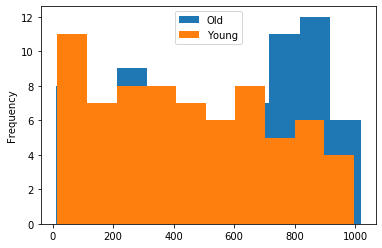

In [40]:
wnba[wnba.Age >= 27]['MIN'].plot.hist(label = 'Old', legend = True)
wnba[wnba.Age < 27]['MIN'].plot.hist(label = 'Young', legend = True)

* ### Most of the old players that belong to the 'average or above' category play signidicantly more than average.

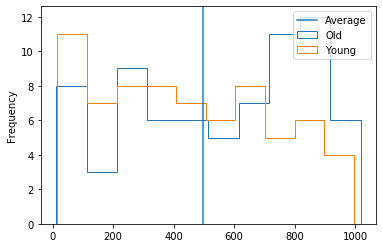

In [46]:
wnba[wnba.Age >= 27]['MIN'].plot.hist(histtype = 'step', label = 'Old', legend = True)
wnba[wnba.Age < 27]['MIN'].plot.hist(histtype = 'step', label = 'Young', legend = True)
plt.axvline(497, label = 'Average')
plt.legend()
plt.show()

* ### The step-type histograms made it possible to see clearly both disbributions. The graph looked a bit overcrowded though, and the legend was not ideally positioned.
* ### Smooth out the histograms, plot.kde(), -- kernel density estimate plot
* ### KDE display densities on the y-axis in stead of frequency. The density values are actually probability values

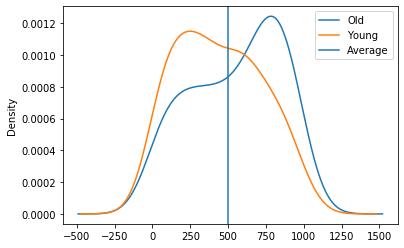

In [49]:
wnba[wnba.Age >= 27]['MIN'].plot.kde(label = 'Old', legend = True)
wnba[wnba.Age < 27]['MIN'].plot.kde(label = 'Young', legend = True)
plt.axvline(x=497, label = 'Average')
plt.legend()
plt.show()

'''We can still observe that most of the old players that belong to the "average or above"
category play significantly more than average. With the help of the vertical line, the pattern
is very easy to notice. Because the graph looks much cleaner than the one with step-type
histograms, we can easily argue that the pattern is much more obvious in the case of kernel density
plots.'''

## Height vs. player position

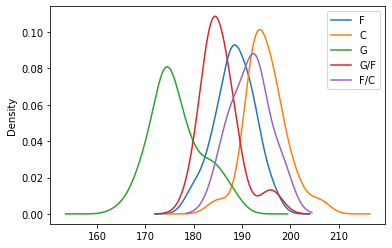

In [52]:
wnba[wnba.Pos == 'F'].Height.plot.kde(label = 'F', legend = True)
wnba[wnba.Pos == 'C'].Height.plot.kde(label = 'C', legend = True)
wnba[wnba.Pos == 'G'].Height.plot.kde(label = 'G', legend = True)
wnba[wnba.Pos == 'G/F'].Height.plot.kde(label = 'G/F', legend = True)
wnba[wnba.Pos == 'F/C'].Height.plot.kde(label = 'F/C', legend = True)

* Too complex, alternative method to visualize this
* 1. Segment the data set by player position
* 2. For every segment:
   * List all the values in the Height variable
   * For every value in that list, draw a bullet point on a graph. The x-coordinate of the bullet point is given by the player position, the y-coordinate by the player's height
## strip plot

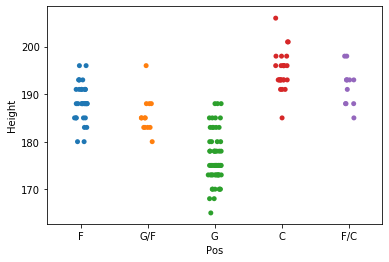

In [56]:
sns.stripplot(x = 'Pos', y = 'Height', data = wnba, jitter=True) #jitter=True to avoid overlap

### pattern
* The shortest players are guards - in fact, all players under 180cm are guards. 
* The tallest players are centers - this is the only category with players above 2 meters.
* Among combined postitions, F/C has slightly taller representatives - more likely because it requires center qualities

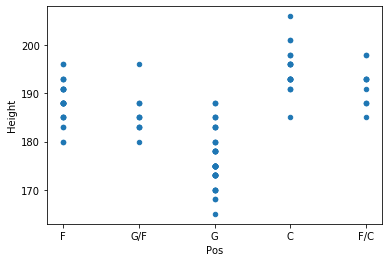

In [57]:
wnba.plot.scatter(x = 'Pos', y='Height',)

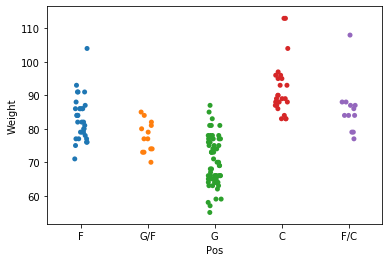

In [60]:
sns.stripplot(x='Pos', y='Weight', data=wnba, jitter=True)

'''The patterns we see are strikingly similar to those we saw for heights. This can be easily
explained by the fact that there's a strong positive relation between a player's height and her
weight: the taller the player, the heavier she is; the shorter the player, the lighter she is.'''

## Besides strip plots, another kind of graph we can use to display many distributions at once and make everything is still readable. -- box-and-whisker plot

In [62]:
wnba[wnba.Pos == 'F']['Height'].describe()[3:]

min    180.0
25%    185.0
50%    188.0
75%    191.0
max    196.0
Name: Height, dtype: float64

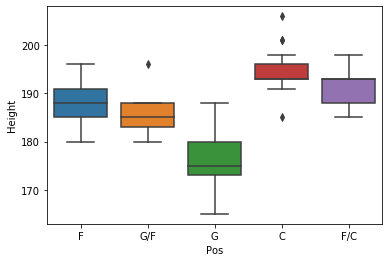

In [63]:
sns.boxplot(x = 'Pos', y = 'Height', data = wnba)

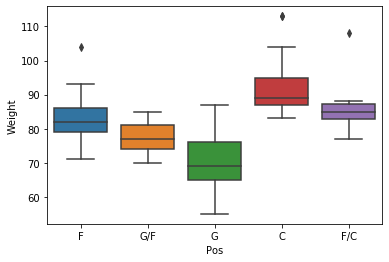

In [64]:
sns.boxplot(x = 'Pos', y = 'Weight', data = wnba)

* A value that is much lower or much larger than the rest of the values in a distribution is called an outlier.
* A value is an outlier if:
   * It's larger than the upper quartile by 1.5 times the difference between the upper quartile and the lower quartile (the difference is also called the interquartile range)
   * It's lower than the lower quartile by 1.5 times the interquartile range.

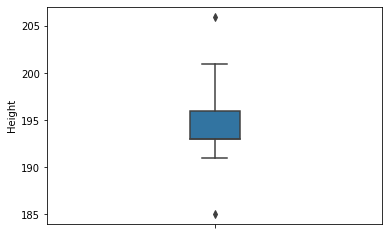

In [69]:
sns.boxplot(wnba[wnba.Pos == 'C']['Height'],whis = 2, orient='vertical', width = .15)
#whis is outlier factor

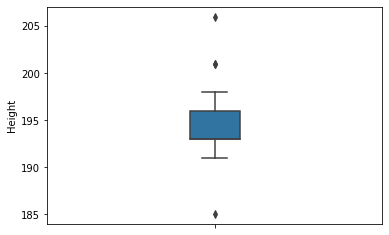

In [77]:
sns.boxplot(wnba[wnba.Pos == 'C']['Height'], orient='vertical', width=.15)

## Distribution of Games Played

In [79]:
print(wnba['Games Played'].describe())

count    143.000000
mean      24.356643
std        7.104259
min        2.000000
25%       22.000000
50%       27.000000
75%       29.000000
max       32.000000
Name: Games Played, dtype: float64


In [93]:
games_quartile = wnba['Games Played'].describe()
iqr = games_quartile.loc['75%'] - games_quartile['25%']
lower_bound = games_quartile.loc['25%'] - 1.5 * iqr
upper_bound = games_quartile.loc['75%'] + 1.5 * iqr
outliers_low = (wnba['Games Played'] < lower_bound).sum()
outliers_high = (wnba['Games Played'] > upper_bound).sum()
#outliers_low = wnba.loc[wnba['Games Played'] < lower_bound, 'Games Played'].count()
#outliers_high = wnba.loc[wnba['Games Played'] > upper_bound, 'Games Played'].count()

In [94]:
outliers_low

12

In [95]:
outliers_high

0

In [96]:
wnba.Height.size

143

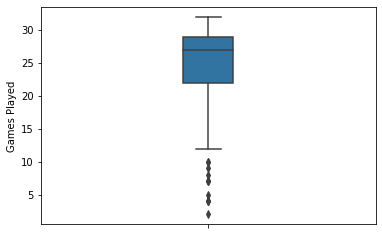

In [97]:
sns.boxplot(wnba['Games Played'], orient='vertical', width=.15)

In this mission, we learned how to compare frequency distributions using graphs. Grouped bar plots are ideal to compare the frequency distributions of nominal or ordinal variables. For variables measured on an interval or ratio scale, we can use step-type histograms, kernel density plots, or, for better readability, strip plots or box plots.